In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
%matplotlib inline

Mobile price depends on various factors such as resolution, brand, size, weight, imaging quality, RAM, battery and cpu power. In this dataset, we want to estimate the price of mobile phones using the above features.

In [2]:
df=pd.read_csv('Cellphone.csv')

In [3]:
df.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [4]:
df.describe()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,675.559006,2215.596273,621.465839,170.426087,5.209938,335.055901,4.857143,1.502832,24.501714,2.204994,10.378261,4.503106,2842.111801,8.921739
std,410.851583,768.187171,1546.618517,92.888612,1.509953,134.826659,2.444016,0.599783,28.804773,1.609831,6.181585,4.342053,1366.990838,2.192564
min,10.000000,614.000000,10.000000,66.000000,1.400000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000
25%,237.000000,1734.000000,37.000000,134.100000,4.800000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.000000,2040.000000,7.600000
50%,774.000000,2258.000000,106.000000,153.000000,5.150000,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2800.000000,8.400000
75%,1026.000000,2744.000000,382.000000,170.000000,5.500000,428.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3240.000000,9.800000
max,1339.000000,4361.000000,9807.000000,753.000000,12.200000,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,9500.000000,18.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


Exploratory Data Analysis

(10.0, 0.0)

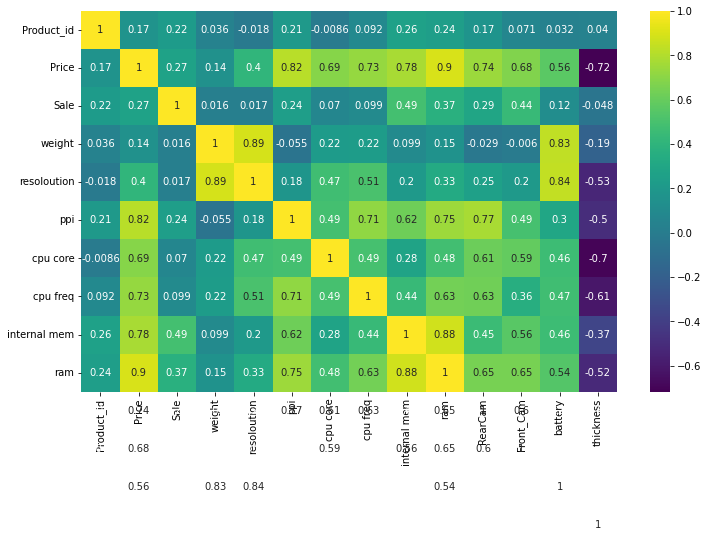

In [9]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.ylim(10, 0)

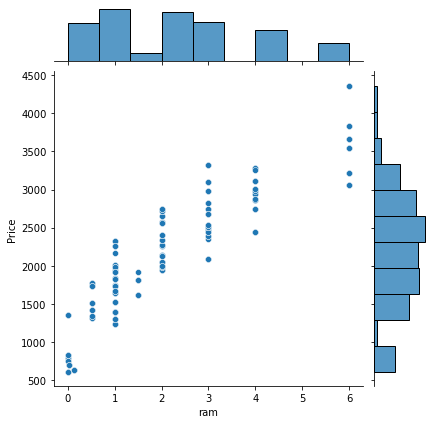

In [10]:
sns.jointplot(x='ram',y='Price',data=df)

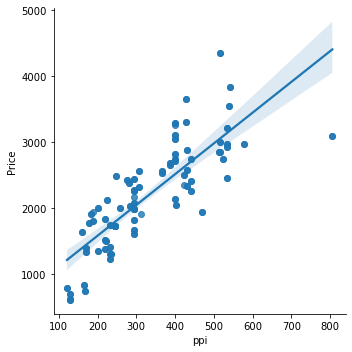

In [12]:
sns.lmplot(x='ppi',y='Price',data=df)

Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets

In [57]:
x=df.drop('Price',axis=1)
y=df['Price']

In [85]:
scaler = StandardScaler()

X = scaler.fit_transform(x)

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [88]:
from sklearn.linear_model import LinearRegression

In [89]:
lm=LinearRegression()

In [90]:
lm.fit(X_train,y_train)

LinearRegression()

In [91]:
lm.coef_

array([ 5.38073284e-02, -1.82887485e-02, -8.81592187e-01, -5.09440811e+01,
        1.10822029e+00,  4.93124037e+01,  1.26691872e+02,  5.26514379e+00,
        1.00906852e+02,  2.55238331e+00,  7.68694997e+00,  1.36214111e-01,
       -7.01639389e+01])

In [92]:
coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Product_id,0.053807
Sale,-0.018289
weight,-0.881592
resoloution,-50.944081
ppi,1.108220
cpu core,49.312404
cpu freq,126.691872
internal mem,5.265144
ram,100.906852
RearCam,2.552383


A positive coefficient indicates that an increase in the corresponding variable is associated with an increase in sales or revenue, while a negative coefficient indicates the opposite.

The magnitude of the coefficient indicates the strength of the effect, with larger coefficients indicating a stronger effect.

The coefficient for "cpu core" (49.31) and "cpu freq" (126.7) are particularly large, suggesting that these variables have a very strong positive effect on sales or revenue.

The coefficient for "resolution" (-51) is negative and very large, suggesting that higher resolution may actually decrease sales or revenue. This may be because higher resolution often results in higher prices, which may deter some customers.

The coefficient for "thickness" (-70.16) is also negative and very large, suggesting that thicker devices are associated with lower sales or revenue.

The coefficients for "ppi", "internal mem", "ram", "RearCam", "Front_Cam", and "battery" are all positive, indicating that increases in these variables are associated with increases in sales or revenue, although the magnitudes of these effects are smaller compared to the effects of "cpu core" and "cpu freq".

In [93]:
predictions = lm.predict( X_test)

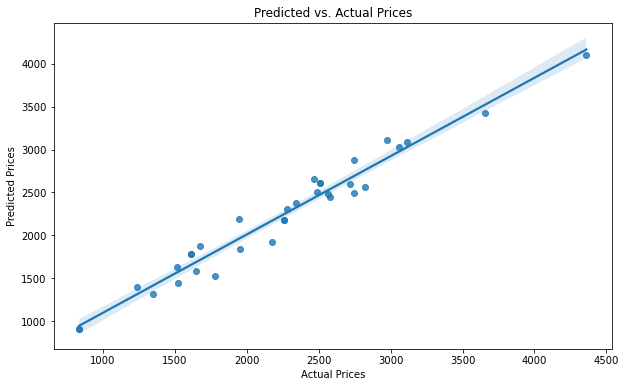

In [94]:
plt.figure(figsize=(10,6))
sns.regplot(x=y_test,y=predictions);
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs. Actual Prices")
plt.show()

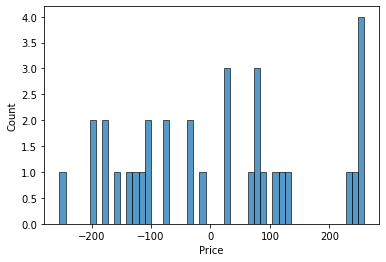

In [95]:
sns.histplot((y_test-predictions),bins=50);

In [96]:
from sklearn import metrics

In [98]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 130.31530961030876
MSE: 23062.229891751358
RMSE: 151.8625361692322
